In [44]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [45]:
#Using pandas we are reading the dataset and naming it as df so that ith will be easier to access it.
df = pd.read_csv('student_scores.csv')

In [46]:
#Below code will return the first few rows of the data.
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [47]:
#This returns how namy rows and columns are present in dataset.
df.shape

(25, 2)

In [48]:
#describe() keyword returns the interquartile ranges of the numerical columns.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
#Returns the datatype and checks for any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


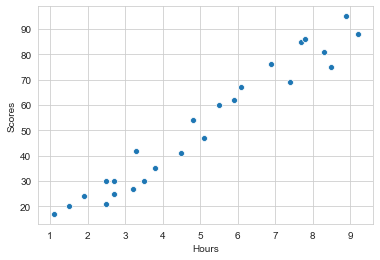

In [50]:
sns.scatterplot(x='Hours', y='Scores', data=df)

Used scatterplot tool from the seaborn to to plot the relation between Hours and Scores

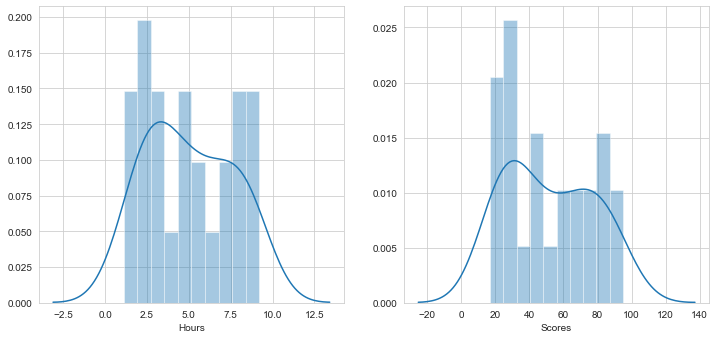

In [51]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.distplot(df['Hours'], bins=10)

plt.subplot(222)
sns.distplot(df['Scores'], bins=10)

The above figure represents the histogram of the Hours and Scores column seperately. We can also know the counts of different values available in the specific columns

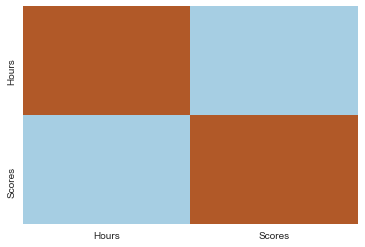

In [52]:
sns.heatmap(df.corr(), cmap='Paired', cbar=False)

Here we are using heatmap to plot a interactive correlation between the columns.

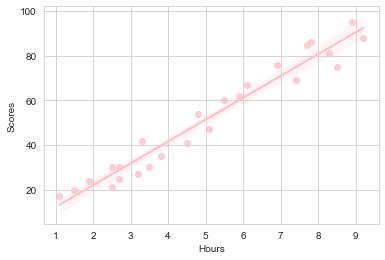

In [53]:
sns.regplot(x='Hours', y='Scores', data=df, color='pink')

Regplot plots the data points of any two columns and also shows a relation among them.
The above figure shows that there is a positive linear relation between Hours and Scores.

In [54]:
#Preparing the dataset for the prediction. Here we are assining 'X' to the independent variable and 'y to the dependent variable.' 
X=df.drop('Scores', axis=1)
y=df['Scores']

Next task is to split our dataset into training and testing sets, we will do it by using scikitlearn's built in model train_test_split.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# importing the built in Linear Regression algorithm  from scikitLearn.linear_model.
from sklearn.linear_model import LinearRegression

In [58]:
#Training the model for further prediction.
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
#Creating a new dataframe which will conontain few Actual vs Predicted value.
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [60]:
#Return the newly created dataframe.
data

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [61]:
#Here we are returning the slope and intercept value used for the prediction.

print('slope: ', model.coef_)
print('intercept', model.intercept_)

slope:  [9.78856669]
intercept 2.370815382341881


In [62]:
#Providing the input of our own value to get the prediction.

hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056
